# Terraces in the first Movement of Sibelius Symphony No. 6

Here goes some nice abstract of the project.

## Introduction

Here goes some nice intro. More text...

Example:
http://localhost:8080/recording/show/187642


In [7]:
print("Hello from python!")


Hello from python!


## Evaluation

* loading data from oma.digital
* login via tokens 



/home/martin/Workspace/oma/jupyter-omaapi/JUPYTER/lib/python3.5/site-packages/ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in reciprocal


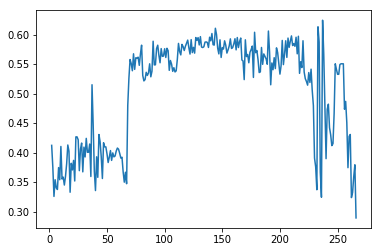

In [35]:
__author__ = "Martin Aigner"

import requests
import json


class Oma:
    def __init__(self, endpoint, access_token, verify_certificate=True):
        self.endpoint = endpoint
        self.access_token = access_token
        self.verify_certificate = verify_certificate
        self.headers = {
            'User-Agent': 'oma.py',
            'Authorization': "Bearer " + access_token
        }
        self.config = {
            "api_path": "api/",
            "cache_dir": "omacache"
        }
        
    def recording(self, id):
        r = Recording(id, self)
        r.get()
        return r
    
    def composer(self, id):
        c = Composer(id, self)
        c.get()
        return c

    def annotation_session(self, id):
        s = AnnotationSession(id, self)
        s.get()
        return s



class ApiObject:
    def __init__(self):
        self.__data_cache = None
        self.oma_login = None
        self.params = {}

    def get(self):
        self.params[self.objectName] = self.id
        url = self.oma_login.endpoint + self.oma_login.config["api_path"] + self.objectName
        response = requests.post(url, headers=self.oma_login.headers, data=self.params, verify=self.oma_login.verify_certificate)
        # print(response.content.decode())
        content = json.loads(response.content.decode())
        self.__data_cache = content

    def dictionary(self):
        if self.__data_cache is None:
            self.get()
        return self.__data_cache


class AnnotationSession(ApiObject):
    def __init__(self, id, oma_login):
        self.id = id
        self.objectName = "session"
        self.oma_login = oma_login
        self.params = {"method": "get"}

        
class Recording(ApiObject):
    def __init__(self, id, oma_login):
        self.id = id
        self.objectName = "recording"
        self.oma_login = oma_login
        self.params = {"method": "get"}

    def get_annotation_sessions(self):
        session = ApiObject()
        session.params["method"] = "findBy"
        session.params["findBy"] = "recording"
        session.params["recording"] = self.id
        session.objectName = "annotation"
        session.id = 0
        session.oma_login = self.oma_login
        session.get()
        return session

        
class Composer(ApiObject):
    def __init__(self, id, oma_login):
        self.id = id
        self.objectName = "composer"
        self.oma_login = oma_login
        self.params = {"method": "get"}

        

url = "http://localhost:8080/"
token = "4fdnupfvk379b52n00m35n1s5jqtc31s"

oma = Oma(url, token)
recording = oma.recording(187642)
#oma.composer(187593)

sessions = recording.get_annotation_sessions()

sessions_data = sessions.dictionary()
sessions_data

session = oma.annotation_session(187979)
annotations = session.dictionary()["annotations"]

import pandas as pd
import numpy as np

df1 = pd.DataFrame(annotations)
df1
time_series = df1["barNumber"].to_numpy()
value_series = df1["momentOfPerception"].to_numpy()

value_series
previous_bar_durations = np.zeros(len(value_series))
for i in range(len(value_series)):
    if i == 0:
        subtract = value_series[i]
    else:
        subtract = value_series[i-1]
    previous_bar_durations[i] = value_series[i] - subtract

previous_bar_durations


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time_series, np.reciprocal(previous_bar_durations))